In [128]:
using Plots
using LinearAlgebra
import PyPlot

In [283]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 1 method)

In [314]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
time = 20
Δt = 0.001

# initial values
x₀ = -15.8; y₀ = -17.48; z₀ = 35.64
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Float64}:
 -15.8
 -17.48
  35.64

In [316]:
# Runga-Kutta 4
#Δt = 0.001
tsteps = Int(time/Δt)
x̄=x̄₀
XRK = zeros(3,tsteps)
for i=1:tsteps
    x̄=RK4(LorentzSystem,[θ,μ,β],x̄,Δt)
    XRK[:,i] = x̄
end
print(x̄)

[-4.081671017763692, -7.149527686514797, 12.303854337141779]

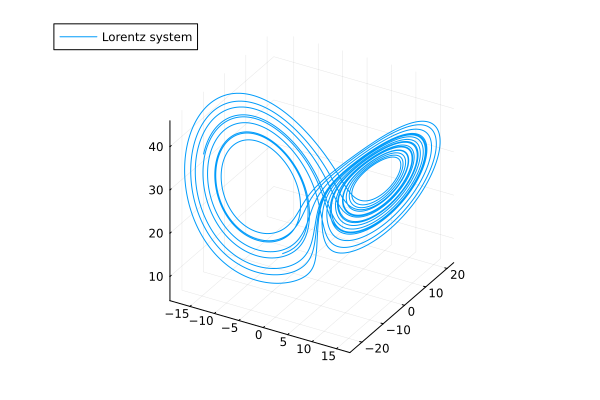

In [253]:
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="Lorentz system")

In [258]:
# Euler
#Δt = 0.001
tsteps = Int(time/Δt)
x̄=x̄₀
Xeuler = zeros(3,tsteps)
for i=1:tsteps
    x̄=EulerForward(LorentzSystem,[θ,μ,β],x̄,Δt)
    Xeuler[:,i] = x̄
end
print(x̄)

[1.7234293456659786, 3.371590937972094, 6.779727013345671]

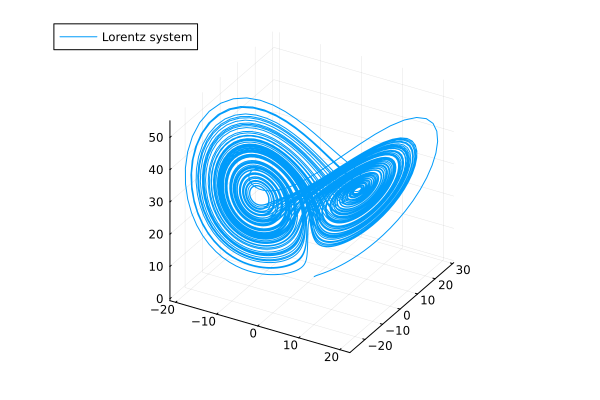

In [125]:
plot(Xeuler[1,:],Xeuler[2,:],Xeuler[3,:],label="Lorentz system")

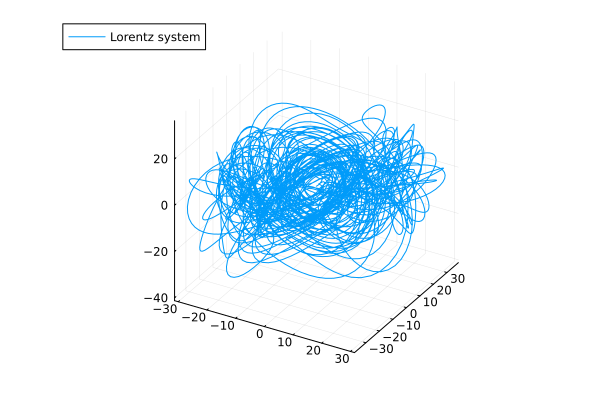

In [137]:
plot(XRK[1,:]-Xeuler[1,:],XRK[2,:]-Xeuler[2,:],XRK[3,:]-Xeuler[3,:],label="Lorentz system")

In [315]:
#DTM
#Δt = 0.001
tsteps = Int(time/Δt)
x̄=x̄₀
terms=10
XDTM = zeros(3,tsteps)
for i=1:tsteps
    x̄=DTM([θ,μ,β],x̄,terms, Δt)
    XDTM[:,i] = x̄
end

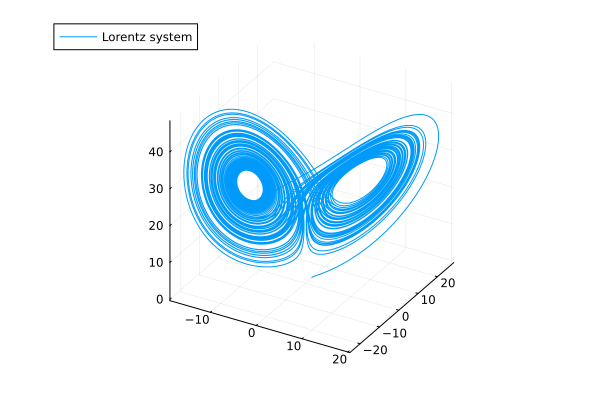

In [200]:
plot(XDTM[1,:],XDTM[2,:],XDTM[3,:],label="Lorentz system")

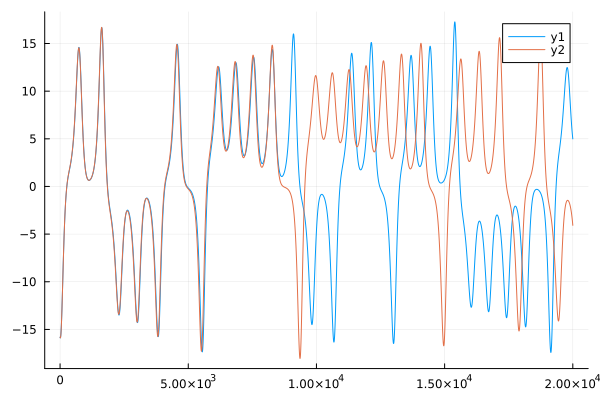

In [317]:
plot(XDTM[1,:])
plot!(XRK[1,:])
#plot!(Xeuler[1,:])

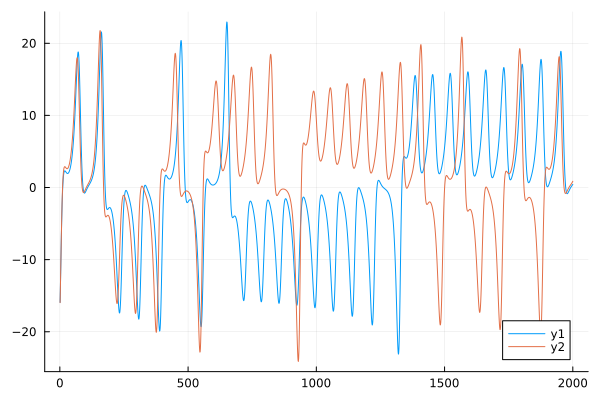

In [313]:
plot(XDTM[2,:])
plot!(XRK[2,:])